In [1]:
import numpy as np
import matplotlib.pyplot as plt

Relaxometry simulations with BPP theory

In [2]:
tc_water = 1.7E-12
tc_blood = 1.6E-7
y = 42.57E6; # MHz/T

def R1_BPP(tc, w0):
    return y**2 * 2*tc/(1+w0**2 * tc**2)

def R2_BPP(tc, w0):
    return 0.5*y**2 * 2*tc + 0.5*R1_BPP(tc, w0)

In [13]:
def plot_relax(tc, relax, ci, lab):
    plt.loglog(tc, 1/relax['r1'], label=f'T1 {lab}', c=f'C0{ci}', linewidth=2)
    plt.loglog(tc, 1/relax['r2'],'--', label=f'T2 {lab}', c=f'C0{ci}', linewidth=2)

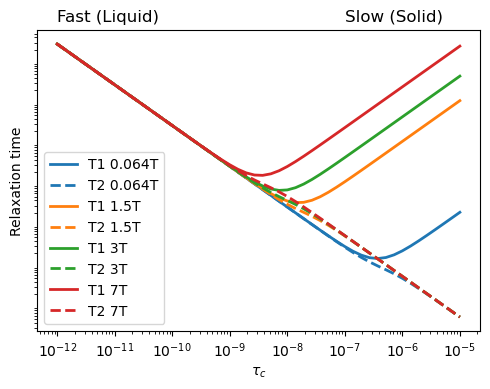

In [48]:
B0_l = [64E-3, 1.5, 3, 7]
fig = plt.figure(figsize=(5,4))
tc = np.logspace(-12,-5)

for i,B0 in enumerate(B0_l):
    relax = {'r1':R1_BPP(tc, B0*y), 'r2':R2_BPP(tc, B0*y)}
    plot_relax(tc, relax, i, f'{B0}T')

plt.xlabel(r"$\tau_c$")
plt.ylabel('Relaxation time')
plt.yticks([])
plt.legend()

plt.text(1E-12, 1E-3, 'Fast (Liquid)', fontsize=12)
plt.text(1E-7, 1E-3, 'Slow (Solid)', fontsize=12)

plt.tight_layout()
plt.show()

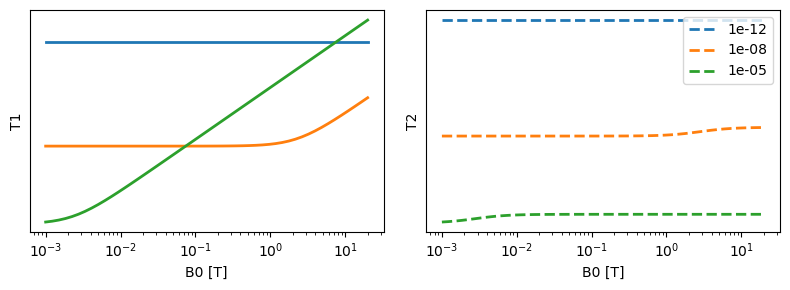

In [34]:
fig = plt.figure(figsize=(8,3))
B0 = np.logspace(np.log10(1E-3), np.log10(20))
ax_T1 = fig.add_subplot(1,2,1)
ax_T2 = fig.add_subplot(1,2,2)

for i,tc in enumerate([1E-12, 1E-8, 1E-5]):
    relax = {'r1':R1_BPP(tc, B0*y), 'r2':R2_BPP(tc, B0*y)}

    ax_T1.loglog(B0, 1/relax['r1'], label=f'{tc}', c=f'C0{i}', linewidth=2)
    ax_T2.loglog(B0, 1/relax['r2'],'--', label=f'{tc}', c=f'C0{i}', linewidth=2)

ax_T1.set_xlabel('B0 [T]')
ax_T2.set_xlabel('B0 [T]')
ax_T1.set_yticks([])
ax_T2.set_yticks([])
ax_T1.set_ylabel('T1')
ax_T2.set_ylabel('T2')

plt.legend()
plt.tight_layout()
plt.show()